# A2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.nn import Sequential, Linear, ReLU, MSELoss
from torch.optim import Adam

In [2]:
from mnist import MNIST
def load_dataset():
    mndata = MNIST('../../../python-mnist/data/')
    X_train, labels_train = map(np.array, mndata.load_training())
    X_test, labels_test = map(np.array, mndata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0
    
    return X_train, labels_train, X_test, labels_test

X_train, Y_train, X_test, Y_test = load_dataset()

X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()

In [3]:
# define the autoencoder
def Autoencoder(d, h):
    model = Sequential(
                Linear(d, h),
                Linear(h, d)
            )
    return model

# dimensions for the autoencoder
d = X_train[0].numel()
hs = [32, 64, 128]

# create loss function
mseLoss = MSELoss()

# dictionary to save losses and predictions
save_dict = {h: dict() for h in hs}

# indices for each digit
# will use these to save predictions for each digit
idx = [np.where(Y_train == digit)[0][0] for digit in range(10)]

# loop over values of h
for h in hs:

    # initialize the model
    model = Autoencoder(d, h)

    # create an optimizer
    lr = 1e-3
    optimizer = Adam(model.parameters(), lr=lr)

    # container to save losses throughout training
    losses = []

    # train the model
    for t in range(500):

        # forward pass
        X_pred = model(X_train)

        # calculate loss
        loss = mseLoss(X_pred, X_train)
        losses.append(loss.item())
        if t % 100 == 99:
            print(h, t, loss.item())
            
        # zero out the gradient buffers
        optimizer.zero_grad()

        # backward pass
        loss.backward()

        # use gradient to step parameters
        optimizer.step()
        
    # save save the losses and the predictions
    save_dict[h]['loss'] = losses
    save_dict[h]['X_pred'] = model(X_train[idx]).detach().numpy()

32 99 0.05009496212005615
32 199 0.035657476633787155
32 299 0.028751732781529427
32 399 0.025036856532096863
32 499 0.022367563098669052
64 99 0.033925868570804596
64 199 0.021605515852570534
64 299 0.016504408791661263
64 399 0.01392955332994461
64 499 0.012367574498057365
128 99 0.02076849713921547
128 199 0.011845226399600506
128 299 0.008699625730514526
128 399 0.007168711628764868
128 499 0.006273341830819845


In [4]:
X_pred = model(X_test)
test_loss1 = mseLoss(X_pred, X_test)

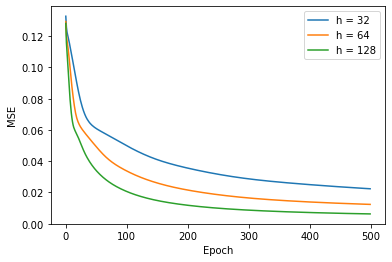

In [5]:
for h in save_dict:
    plt.plot(save_dict[h]['loss'], label=f'h = {h}')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

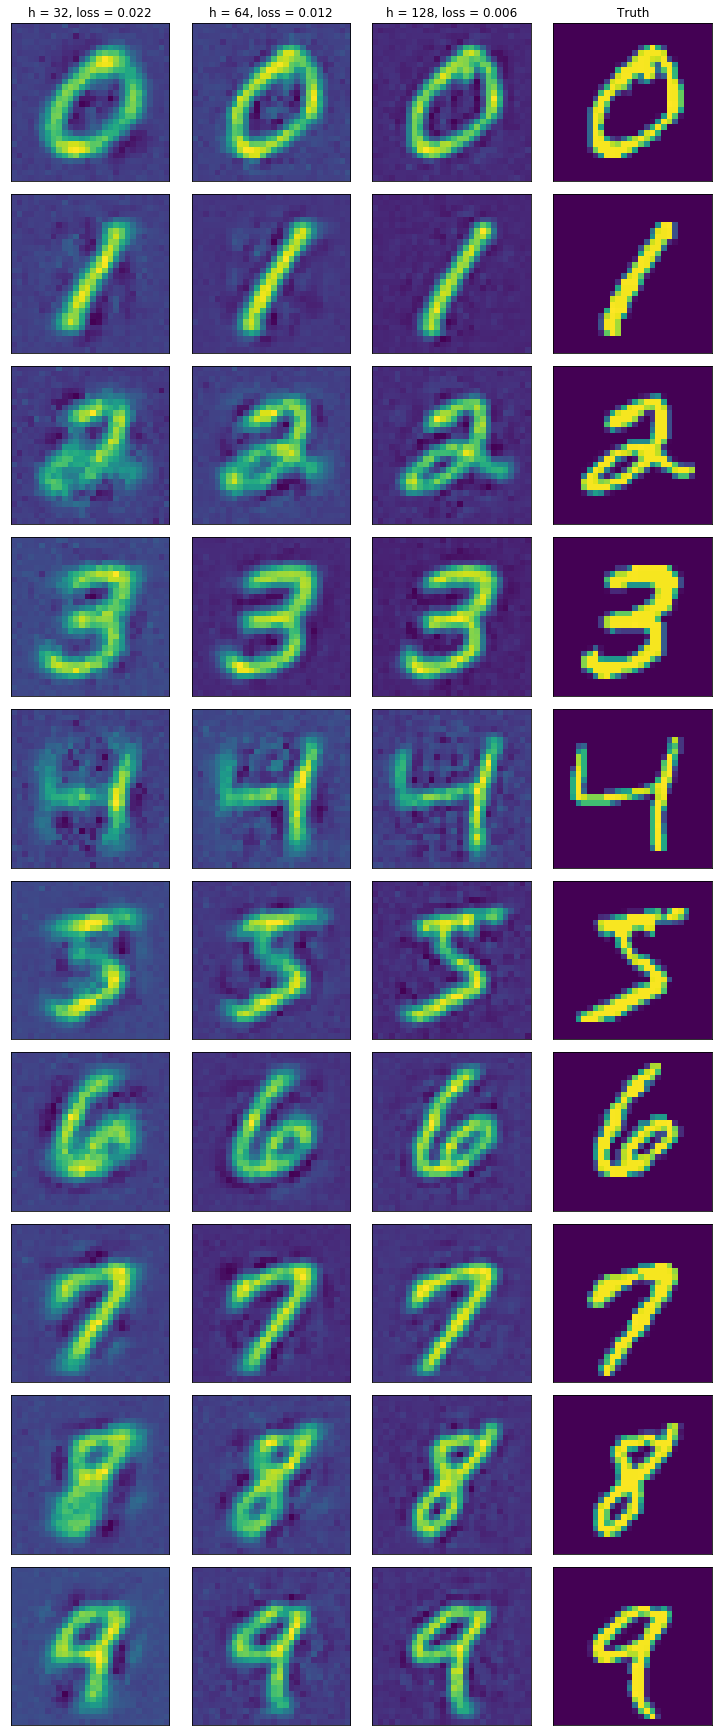

In [7]:
fig,axes = plt.subplots(10,4, figsize=(10,24), constrained_layout=True)

for j,h in enumerate(save_dict):
    loss = save_dict[h]['loss'][-1]
    axes[0,j].set_title(f'h = {h}, loss = {loss:.3f}')
    X_pred = save_dict[h]['X_pred']
    for i,X in enumerate(X_pred):
        axes[i,j].imshow(X.reshape(28,28))
        axes[i,j].set(xticks=[],yticks=[])

axes[0,-1].set_title('Truth')
X_truth = X_train[idx]
for i,X in enumerate(X_truth):
    axes[i,-1].imshow(X.reshape(28,28))
    axes[i,-1].set(xticks=[],yticks=[])
    
fig.savefig('A2a.pdf')

In [8]:
# define the autoencoder
def Autoencoder(d, h):
    model = Sequential(
                Linear(d, h),
                ReLU(),
                Linear(h, d),
                ReLU()
            )
    return model

# dimensions for the autoencoder
d = X_train[0].numel()
hs = [32, 64, 128]

# create loss function
mseLoss = MSELoss()

# dictionary to save losses and predictions
save_dict2 = {h: dict() for h in hs}

# indices for each digit
# will use these to save predictions for each digit
idx = [np.where(Y_train == digit)[0][0] for digit in range(10)]

# loop over values of h
for h in hs:

    # initialize the model
    model2 = Autoencoder(d, h)

    # create an optimizer
    lr = 1e-3
    optimizer = Adam(model2.parameters(), lr=lr)

    # container to save losses throughout training
    losses = []

    # train the model
    for t in range(500):

        # forward pass
        X_pred = model2(X_train)

        # calculate loss
        loss = mseLoss(X_pred, X_train)
        losses.append(loss.item())
        if t % 100 == 99:
            print(h, t, loss.item())
            
        # zero out the gradient buffers
        optimizer.zero_grad()

        # backward pass
        loss.backward()

        # use gradient to step parameters
        optimizer.step()
        
    # save save the losses and the predictions
    save_dict2[h]['loss'] = losses
    save_dict2[h]['X_pred'] = model2(X_train[idx]).detach().numpy()

32 99 0.04804030433297157
32 199 0.03142411634325981
32 299 0.025964343920350075
32 399 0.023031802847981453
32 499 0.021222809329628944
64 99 0.02838647924363613
64 199 0.01639532670378685
64 299 0.013204406946897507
64 399 0.011680391617119312
64 499 0.010693688876926899
128 99 0.017961574718356133
128 199 0.01042876299470663
128 299 0.008312178775668144
128 399 0.007304096128791571
128 499 0.006725302431732416


In [9]:
X_pred = model2(X_test)
test_loss2 = mseLoss(X_pred, X_test)

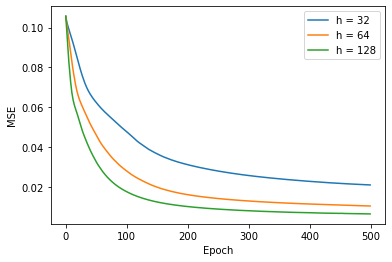

In [10]:
for h in save_dict2:
    plt.plot(save_dict2[h]['loss'], label=f'h = {h}')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

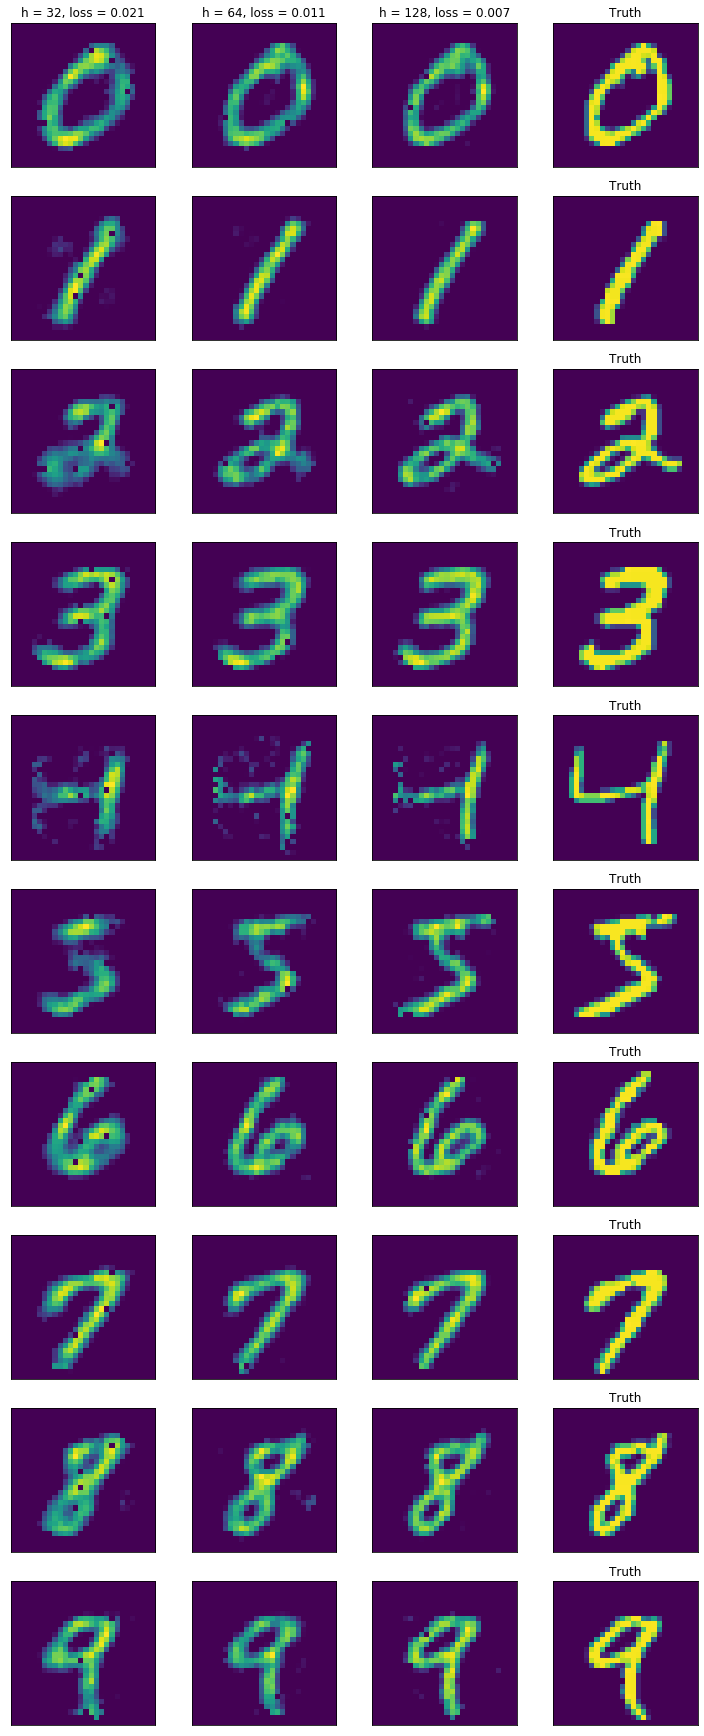

In [11]:
fig,axes = plt.subplots(10,4, figsize=(10,24), constrained_layout=True)

for j,h in enumerate(save_dict2):
    loss = save_dict2[h]['loss'][-1]
    axes[0,j].set_title(f'h = {h}, loss = {loss:.3f}')
    X_pred = save_dict2[h]['X_pred']
    for i,X in enumerate(X_pred):
        axes[i,j].imshow(X.reshape(28,28))
        axes[i,j].set(xticks=[],yticks=[])
        
X_truth = X_train[idx]
for i,X in enumerate(X_truth):
    axes[i,-1].set_title('Truth')
    axes[i,-1].imshow(X.reshape(28,28))
    axes[i,-1].set(xticks=[],yticks=[])
    
fig.savefig('A2b.pdf')

In [12]:
print(test_loss1)
print(test_loss2)

tensor(0.0061, grad_fn=<MseLossBackward>)
tensor(0.0066, grad_fn=<MseLossBackward>)


# B1

Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

data = []
with open("u.data") as csvfile:
    spamreader = csv.reader(csvfile, delimiter="\t")
    for row in spamreader:
        data.append([int(row[0])-1, int(row[1])-1, int(row[2])])
data = np.array(data)

num_observations = len(data) # num_observations = 100,000
num_users = max(data[:,0])+1 # num_users = 943, indexed 0,...,942
num_items = max(data[:,1])+1 # num_items = 1682 indexed 0,...,1681

np.random.seed(1)
num_train = int(0.8*num_observations)
perm = np.random.permutation(data.shape[0])
train = data[perm[0:num_train],:]
test = data[perm[num_train::],:]

### B1a

In [10]:
# dictionaries to calculate mean score
scores = {m: 0 for m in range(num_items)}
count = {m: 0 for m in range(num_items)}

# sum up totals
for user, movie, score in train:
    scores[movie] += score
    count[movie] += 1

# calculate mean scores
for movie in scores:
    N = max(count[movie], 1)
    scores[movie] /= N
    
# calculate test error
err = np.mean((test[:,2] - np.vectorize(scores.get)(test[:,1]))**2)
print(f'Test Error = {err:.3f}')

Test Error = 1.064


### B1b

In [156]:
from scipy.sparse.linalg import svds

Rtrain = np.zeros((num_items, num_users))
Rtrain[train[:,1], train[:,0]] = train[:,2]

Rtest = np.zeros((num_items, num_users))
Rtest[test[:,1], test[:,0]] = test[:,2]

train_err = []
test_err = []
ds = [1,2,5,10,20,50]
for d in ds:
    U, S, VH = svds(Rtrain, k=d)
    Rhat = U @ (S[..., None] * VH)
    Rhat = Rhat.flatten()
    
    Rtrain_ = Rtrain.flatten()
    idx = np.where(Rtrain_ != 0)
    train_err.append(np.mean((Rtrain_[idx] - Rhat[idx])**2))

    Rtest_ = Rtest.flatten()
    idx = np.where(Rtest_ != 0)
    test_err.append(np.mean((Rtest_[idx] - Rhat[idx])**2))

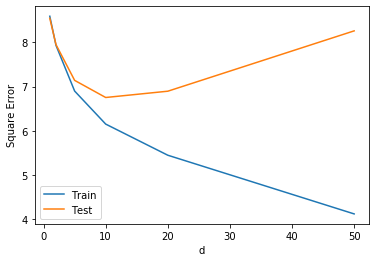

In [159]:
plt.plot(ds, train_err, label='Train')
plt.plot(ds, test_err, label='Test')
plt.legend()
plt.xlabel('d')
plt.ylabel("Square Error")
plt.savefig('B1b.pdf')

### B1c

In [17]:
# http://alexhwilliams.info/itsneuronalblog/2018/02/26/censored-lstsq/

def lstsq_missing_vals(A, B, M, lam=10):
    rhs = (A.T @ (M * B)).T[:,:,None]
    T = A.T[None,:,:] @ (M.T[:,:,None] * A[None,:,:])
    Id = lam * np.identity(T.shape[1])[None,...]
    return np.linalg.solve(T + Id, rhs).squeeze().T

In [18]:
from scipy.sparse.linalg import svds

Rtrain = np.zeros((num_users, num_items))
Rtrain[train[:,0], train[:,1]] = train[:,2]

Rtest = np.zeros((num_users, num_items))
Rtest[test[:,0], test[:,1]] = test[:,2]

train_err = []
test_err = []
ds = [2,5,10,20,50]
for d in ds:
    print(d)
    
    U, S, VH = svds(Rtrain, k=d)
    U_ = 0 * U
    VH = S[..., None] * VH
    VH_ = 0 * VH

    M = Rtrain.clip(0,1)

    while not np.allclose(U, U_) or not np.allclose(VH, VH_):
        U_, VH_ = U, VH
        VH = lstsq_missing_vals(U, Rtrain, M)
        U = lstsq_missing_vals(VH.T, Rtrain.T, M.T).T
        
    
    Rhat = U @ VH
    Rhat = Rhat.flatten()

    Rtrain_ = Rtrain.flatten()
    idx = np.where(Rtrain_ != 0)
    train_err.append(np.mean((Rtrain_[idx] - Rhat[idx])**2))

    Rtest_ = Rtest.flatten()
    idx = np.where(Rtest_ != 0)
    test_err.append(np.mean((Rtest_[idx] - Rhat[idx])**2))    

2
5
10
20
50


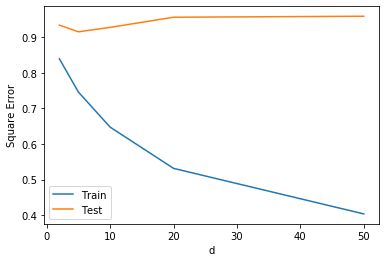

In [21]:
plt.plot(ds, train_err, label='Train')
plt.plot(ds, test_err, label='Test')
plt.legend()
plt.xlabel('d')
plt.ylabel("Square Error")
plt.savefig('B1c.pdf')

In [155]:
Rhat = U @ VH
Rhat = Rhat.flatten()

Rtrain_ = Rtrain.flatten()
idx = np.where(Rtrain_ != 0)
print(np.mean((Rtrain_[idx] - Rhat[idx])**2))

Rtest_ = Rtest.flatten()
idx = np.where(Rtest_ != 0)
print(np.mean((Rtest_[idx] - Rhat[idx])**2))

0.4309242236907635
1.107933499071229


In [152]:
Rhat = U @ VH
Rhat = Rhat.flatten()

Rtrain_ = Rtrain.flatten()
idx = np.where(Rtrain_ != 0)
print(np.mean((Rtrain_[idx] - Rhat[idx])**2))

Rtest_ = Rtest.flatten()
idx = np.where(Rtest_ != 0)
print(np.mean((Rtest_[idx] - Rhat[idx])**2))

0.647392907211266
0.927963470632676


In [5]:
Rtrain.shape

(943, 1682)